In [23]:
#Import lib
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Analysis of wine characteristics

In [2]:
#loading dataset
wine_dataframe = pd.read_csv('datatest.csv', index_col=0)

#dataset cleaning
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)
wine_dataframe = wine_dataframe.drop('Aromas', axis=1)
wine_dataframe = wine_dataframe.drop('Olphactive', axis=1)

wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].str.replace(';', '')
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].str.replace(';', '')
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].str.replace(';', '')
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].str.replace(';', '')
wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].astype(float)
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].astype(float)
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].astype(float)
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].astype(float)


In [5]:
#remove observations for which all continuous values are missing
mask = (wine_dataframe['Léger to Puissant'] != 0) | (wine_dataframe['Souple to Tannique'] != 0) | (wine_dataframe['Sec to Moelleux'] != 0) | (wine_dataframe['Doux to Acide'] != 0)
wine_dataframe = wine_dataframe[mask]

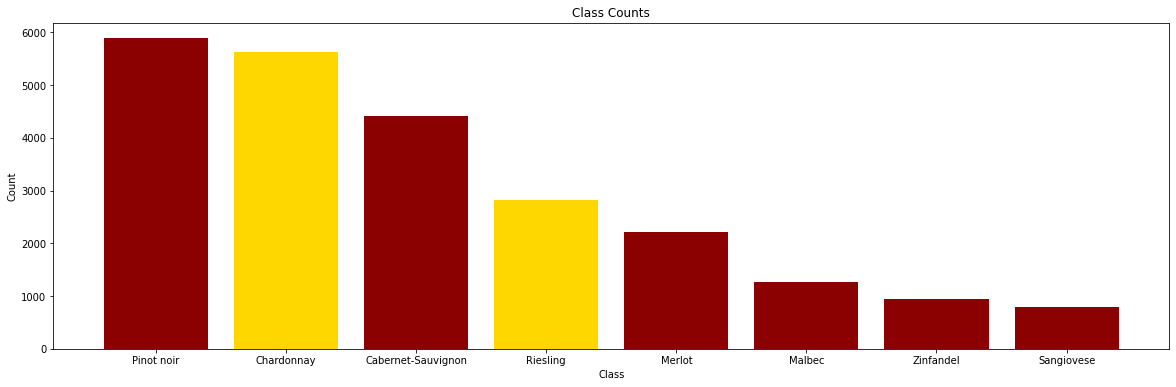

In [6]:
#count number of observations per variety
class_counts = wine_dataframe['Cépages'].value_counts()

#plot the result
fig, ax = plt.subplots(figsize=(20, 6))
colors = ['darkred' if x not in ['Chardonnay', 'Riesling'] else 'gold' for x in class_counts.index]
ax.bar(class_counts.index, class_counts.values, color=colors)

# Set the title and axis labels
plt.title('Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')

# Save the plot as an image file
plt.savefig('wine_value_count.png', dpi=300)
plt.show()

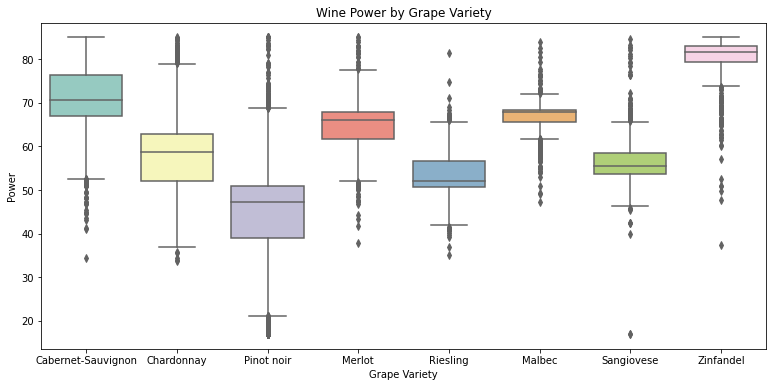

In [8]:
# Create a boxplot for parameter Power
plt.figure(figsize=(13, 6))
sns.boxplot(x="Cépages", y="Léger to Puissant", data=wine_dataframe, palette = "Set3")

# Set the title and axis labels
plt.title("Wine Power by Grape Variety")
plt.xlabel("Grape Variety")
plt.ylabel("Power")

# Save the plot as an image file
plt.savefig("wine_boxplot_power.png", dpi=300)

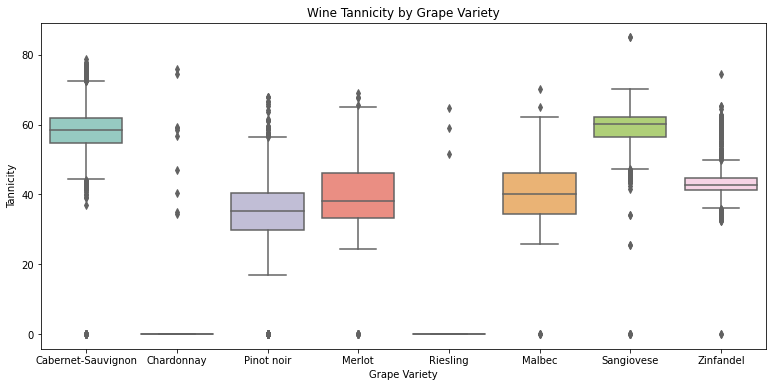

In [9]:
# Create a boxplot for parameter Tannicity
plt.figure(figsize=(13, 6))
sns.boxplot(x="Cépages", y="Souple to Tannique", data=wine_dataframe, palette = "Set3")

# Set the title and axis labels
plt.title("Wine Tannicity by Grape Variety")
plt.xlabel("Grape Variety")
plt.ylabel("Tannicity")

# Save the plot as an image file
plt.savefig("wine_boxplot_tannicity.png", dpi=300)

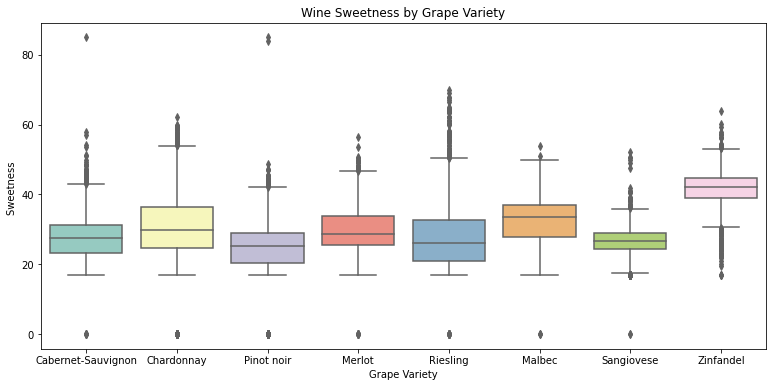

In [10]:
# Create a boxplot for parameter Sweetness
plt.figure(figsize=(13, 6))
sns.boxplot(x="Cépages", y="Sec to Moelleux", data=wine_dataframe,  palette = "Set3")

# Set the title and axis labels
plt.title("Wine Sweetness by Grape Variety")
plt.xlabel("Grape Variety")
plt.ylabel("Sweetness ")

# Save the plot as an image file
plt.savefig("wine_boxplot_sweetness.png",dpi=300)

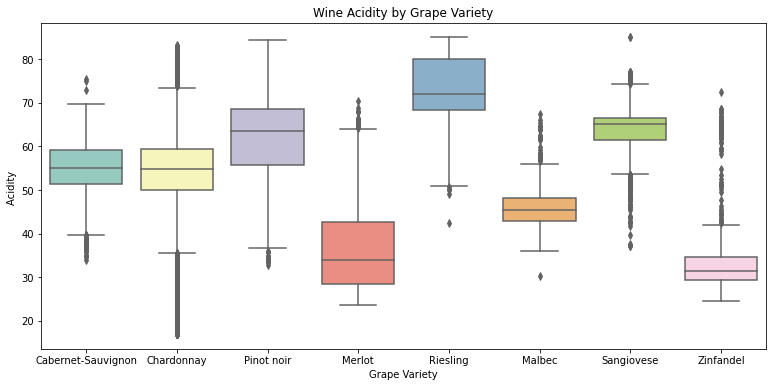

In [11]:
# Create a boxplot for parameter Acidity
plt.figure(figsize=(13, 6))
sns.boxplot(x="Cépages", y="Doux to Acide", data=wine_dataframe, palette = "Set3")

# Set the title and axis labels
plt.title("Wine Acidity by Grape Variety")
plt.xlabel("Grape Variety")
plt.ylabel("Acidity ")

# Save the plot as an image file
plt.savefig("wine_boxplot_acidity.png",dpi=300)

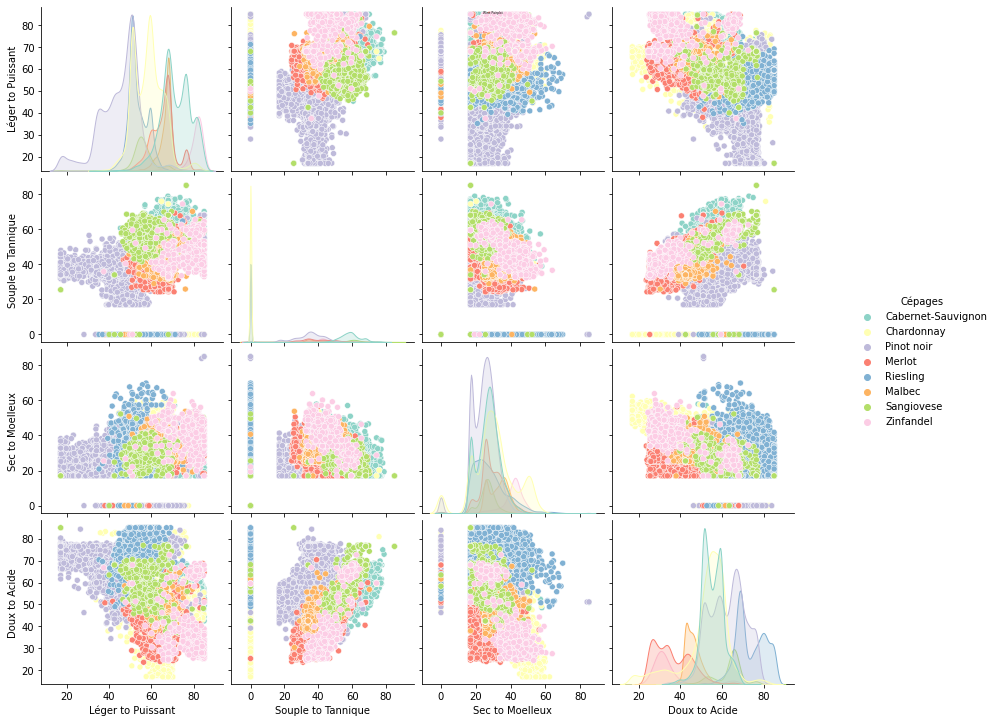

In [12]:
# Create a pairplot for the all parameters
sns.pairplot(wine_dataframe, hue="Cépages", height=3, palette="Set3")

# Set the title and axis labels
plt.suptitle('Wine Pairplot', size=3)
plt.subplots_adjust(right=0.8, bottom=0.2)

# Save the plot as an image file
plt.savefig('wine_pairplot.png', dpi=300)

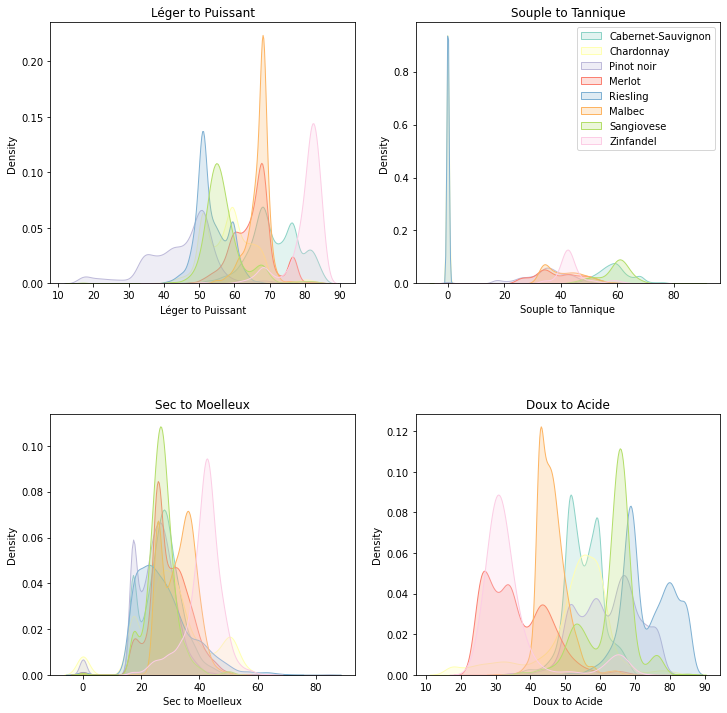

In [13]:
# Present only the diagonal of pairplot
sns.set_palette("Set3")
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

varieties = ['Cabernet-Sauvignon', 'Chardonnay', 'Pinot noir', 'Merlot', 'Riesling', 'Malbec', 'Sangiovese', 'Zinfandel']

for i, col in enumerate(wine_dataframe.columns[:4]):
    for variety in varieties:
        sns.kdeplot(wine_dataframe.loc[wine_dataframe['Cépages'] == variety, col], palette="Set3", label=variety, ax=axes[i//2][i%2],shade=True)

    axes[i//2][i%2].set_title(col)
    
    if i == 1:
        axes[i//2][i%2].legend(loc='upper right')

fig.subplots_adjust(hspace=0.5)

# Save the plot as an image file
plt.savefig('wine_density.png',dpi=300)
plt.show()

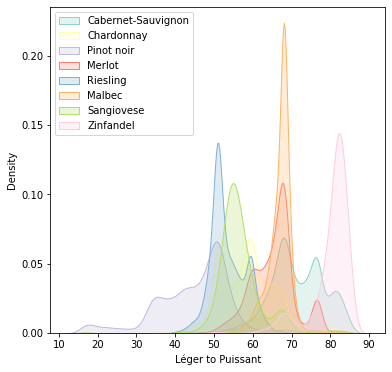

In [14]:
# Select only Power parameter
sns.set_palette("Set3")
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

varieties = ['Cabernet-Sauvignon', 'Chardonnay', 'Pinot noir', 'Merlot', 'Riesling', 'Malbec', 'Sangiovese', 'Zinfandel']

for i, col in enumerate(wine_dataframe.columns[:1]):
    for variety in varieties:
        sns.kdeplot(wine_dataframe.loc[wine_dataframe['Cépages'] == variety, col], 
                    palette="Set3", label=variety, shade=True)

    if i == 0:
        plt.legend(loc='upper left')

fig.subplots_adjust(hspace=0.5)
#plt.savefig('wine_Power_density.png', dpi=300)

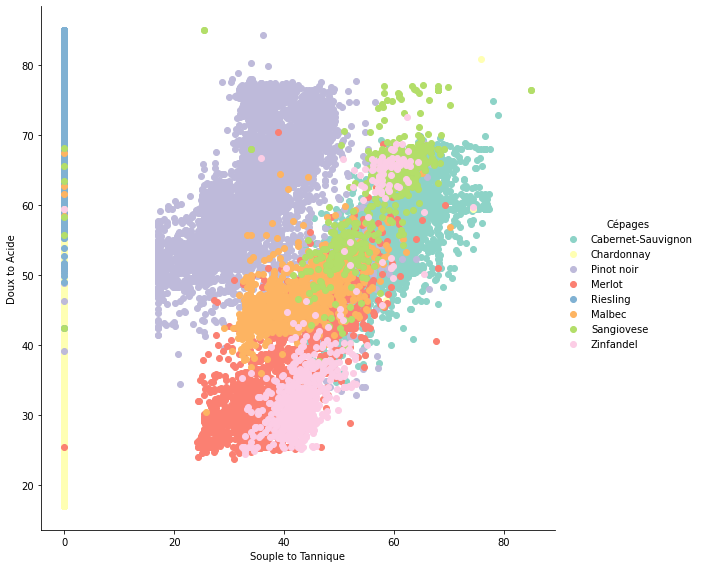

In [16]:
# Represent relation between Tannicity and Acidity
sns.FacetGrid(wine_dataframe, hue="Cépages", height=8, palette="Set3") \
   .map(plt.scatter, "Souple to Tannique", "Doux to Acide") \
   .add_legend()

# Save the plot as an image file
plt.savefig('wine_Acidity_Tannicity.png',dpi=300)

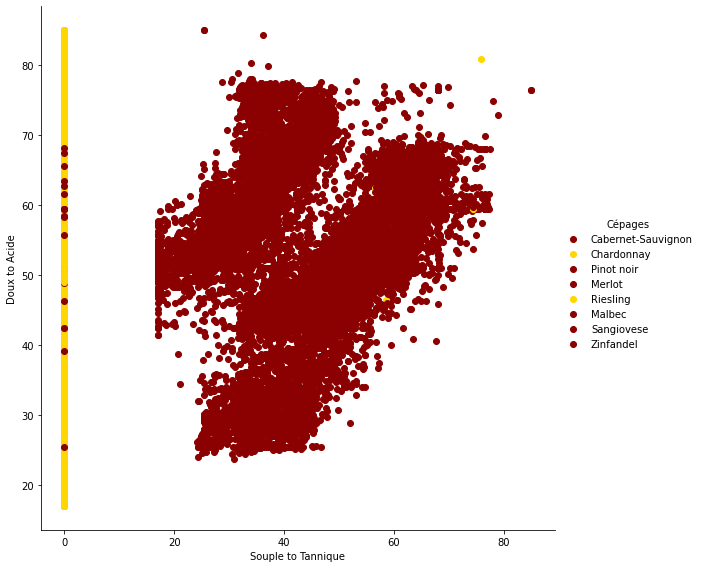

In [17]:
# Create dictionary of color options
palette = {"Cabernet-Sauvignon": "darkred", 
           "Chardonnay": "gold",
           "Pinot noir": "darkred", 
           "Merlot": "darkred", 
           "Riesling": "gold", 
           "Malbec": "darkred",
           "Sangiovese": "darkred",
           "Zinfandel": "darkred"}

# Represent relation between Tannicity and Acidity
sns.FacetGrid(wine_dataframe, hue="Cépages", height=8, palette=palette) \
   .map(plt.scatter, "Souple to Tannique", "Doux to Acide") \
   .add_legend()

# Save the plot as an image file
plt.savefig('wine_Tannicity_Acidity_bichrome.png',dpi=300)

# Analysis of Aromas

In [20]:
# Loading dataset
wine_dataframe = pd.read_csv('datatest.csv', index_col=0)

# Cleaning dataset
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)
wine_dataframe = wine_dataframe.drop('Léger to Puissant', axis=1)
wine_dataframe = wine_dataframe.drop('Souple to Tannique', axis=1)
wine_dataframe = wine_dataframe.drop('Sec to Moelleux', axis=1)
wine_dataframe = wine_dataframe.drop('Doux to Acide', axis=1)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('/+', '+', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace(',+', '+', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('/+', '+', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace(',+', '+', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã©', 'é', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã‰', 'é', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã©', 'é', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã‰', 'é', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lower()
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lower()
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lstrip('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lstrip('+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.split('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.split('+')

wine_dataframe['Aromas'] = wine_dataframe['Aromas'].apply(lambda x: [] if isinstance(x, float) else x)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].apply(lambda x: [] if isinstance(x, float) else x)

# Transform list of aromas and olphactive into binary variables
mlb = MultiLabelBinarizer()
Aromas_one_hot_encoded = mlb.fit_transform(wine_dataframe['Aromas'])
Aromas_df_encoded = pd.DataFrame(Aromas_one_hot_encoded, columns=mlb.classes_)
Olphactive_one_hot_encoded = mlb.fit_transform(wine_dataframe['Olphactive'])
Olphactive_df_encoded = pd.DataFrame(Olphactive_one_hot_encoded, columns=mlb.classes_)
df_concatenated_0 = pd.concat([wine_dataframe, Aromas_df_encoded], axis=1)
df_concatenated = pd.concat([df_concatenated_0, Olphactive_df_encoded], axis=1)
df_concatenated.drop('Aromas', axis=1, inplace=True)
df_concatenated.drop('Olphactive', axis=1, inplace=True)
df_concatenated = df_concatenated.loc[:, ~df_concatenated.columns.duplicated()]

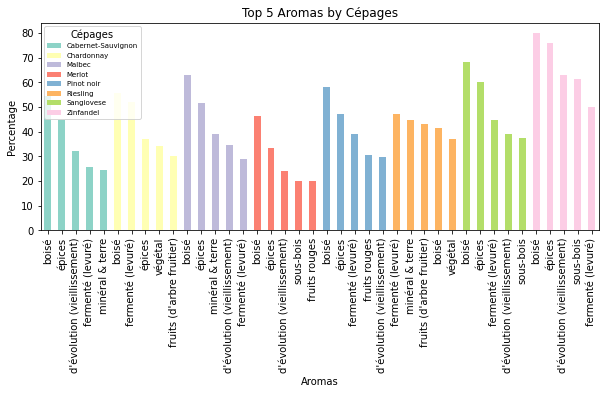

In [22]:
# Group by 'Cépages' and sum the binary columns
grouped = df_concatenated.groupby('Cépages').sum()

# Calculate the total number of observations for each group
total_obs = df_concatenated.groupby('Cépages').size()

# Get the top 5 aromas for each group
top5 = pd.DataFrame()
for group in grouped.index:
    # Calculate the percentage of each aroma for each group
    perc = grouped.loc[group] / total_obs[group] * 100
    top5 = top5.append(perc.nlargest(5).reset_index())

# Plot a stacked bar chart of the top 5 aromas for each group
top5.plot(kind='bar', stacked=True, x='index', figsize=(10,6))
plt.xlabel('Aromas')
plt.ylabel('Percentage')
plt.title('Top 5 Aromas by Cépages')
plt.legend(title='Cépages', loc='upper left', fontsize=7)
plt.subplots_adjust(bottom=0.4)

plt.savefig('wine_aromas.png', dpi=300)

plt.show()


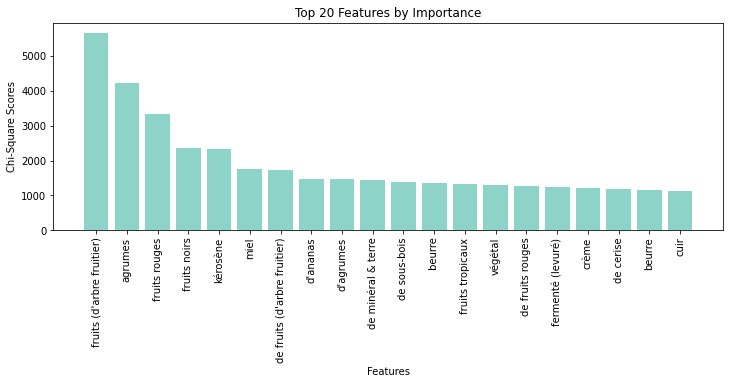

In [26]:
# Goal is to select the 20 aromas with the highest chi-square score
X = df_concatenated.drop('Cépages', axis=1)
y = df_concatenated['Cépages']

# Calculate chi-square score and Select top 20 features
selector = SelectKBest(score_func=chi2, k=20) 
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

scores = selector.scores_
idxs = range(len(scores))

top_idxs = sorted(idxs, key=lambda i: scores[i], reverse=True)[:20]
top_scores = [scores[i] for i in top_idxs]
top_features = [X.columns[i] for i in top_idxs]

# Plot the results
plt.figure(figsize=(12, 6))  
plt.bar(range(len(top_scores)), top_scores)
plt.xticks(range(len(top_scores)), top_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Chi-Square Scores')
plt.title('Top 20 Features by Importance')
plt.subplots_adjust(bottom=0.4)
plt.savefig('wine_feature_importance.png', dpi=300)
plt.show()


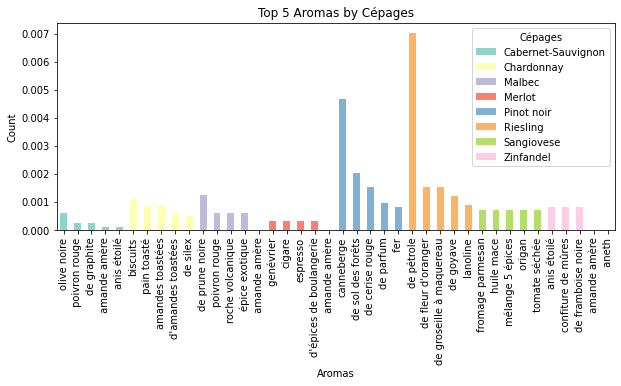

In [27]:
# group by variety and calculate the percentage of presence for each aroma
grouped = df_concatenated.groupby('Cépages').mean()
aromas = grouped.columns[(grouped > 0).sum() <= 1]
top5 = pd.DataFrame()
for group in grouped.index:
    top5 = top5.append(grouped.loc[[group], aromas].T.nlargest(5, group).reset_index())
    
# plot the results
top5.plot(kind='bar', stacked=True, x='index', figsize=(10,6))
plt.xlabel('Aromas')
plt.ylabel('Count')
plt.title('Top 5 Aromas by Cépages')
plt.legend(title='Cépages', loc='upper right', fontsize=10)
plt.subplots_adjust(bottom=0.4)
plt.savefig('wine_unique_aroma.png', dpi=300)
plt.show()

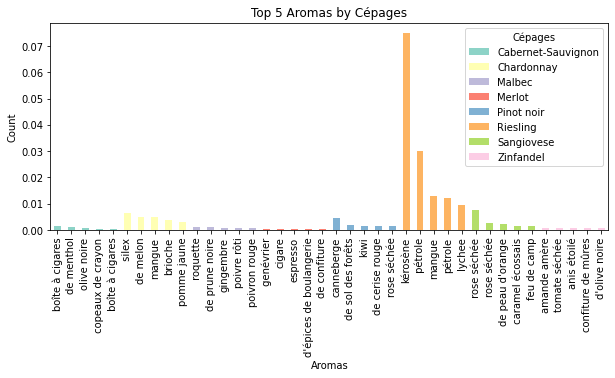

In [28]:
# group by variety and calculate the percentage of presence for each aroma (can be in 2)
grouped = df_concatenated.groupby('Cépages').mean()
aromas = grouped.columns[(grouped > 0).sum() <= 2]
top5 = pd.DataFrame()
for group in grouped.index:
    top5 = top5.append(grouped.loc[[group], aromas].T.nlargest(5, group).reset_index())

# plot the results
top5.plot(kind='bar', stacked=True, x='index', figsize=(10,6))
plt.xlabel('Aromas')
plt.ylabel('Count')
plt.title('Top 5 Aromas by Cépages')
plt.legend(title='Cépages', loc='upper right', fontsize=10)
plt.subplots_adjust(bottom=0.4)
plt.savefig('wine_double_aroma.png', dpi=300)
plt.show()


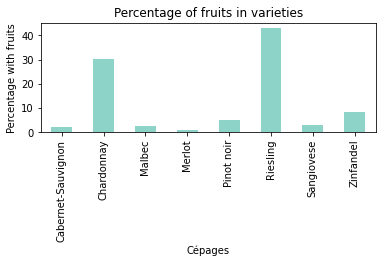

In [29]:
# Find the percentage of observations per variety containing the aroma 'fruits d'arbre fruitier'
grouped = df.groupby('Cépages')['fruits (d\'arbre fruitier)'].mean() * 100
grouped.plot(kind='bar')
plt.title('Percentage of fruits in varieties')
plt.xlabel('Cépages')
plt.ylabel('Percentage with fruits')
plt.subplots_adjust(bottom=0.5)
plt.savefig('wine_fruit.png', dpi=300)
plt.show()

# Analysis of Aromas in Red Wines only

In [35]:
# Loading dataset 
wine_dataframe = pd.read_csv('modified_datatest.csv', index_col=0)

# Cleaning dataset
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe[wine_dataframe['Red'] != 0]
wine_dataframe = wine_dataframe.drop('Red', axis=1)
wine_dataframe = wine_dataframe.reset_index()
wine_dataframe = wine_dataframe.drop('Unnamed: 0', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)
wine_dataframe = wine_dataframe.drop('Léger to Puissant', axis=1)
wine_dataframe = wine_dataframe.drop('Souple to Tannique', axis=1)
wine_dataframe = wine_dataframe.drop('Sec to Moelleux', axis=1)
wine_dataframe = wine_dataframe.drop('Doux to Acide', axis=1)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('/+', '+', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace(',+', '+', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('/+', '+', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace(',+', '+', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã©', 'é', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã‰', 'é', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã©', 'é', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã‰', 'é', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lower()
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lower()
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lstrip('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lstrip('+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.split('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.split('+')

wine_dataframe['Aromas'] = wine_dataframe['Aromas'].apply(lambda x: [] if isinstance(x, float) else x)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].apply(lambda x: [] if isinstance(x, float) else x)

# Transform list of aromas and olphactive into binary variables
mlb = MultiLabelBinarizer()
Aromas_one_hot_encoded = mlb.fit_transform(wine_dataframe['Aromas'])
Aromas_df_encoded = pd.DataFrame(Aromas_one_hot_encoded, columns=mlb.classes_)
Olphactive_one_hot_encoded = mlb.fit_transform(wine_dataframe['Olphactive'])
Olphactive_df_encoded = pd.DataFrame(Olphactive_one_hot_encoded, columns=mlb.classes_)

df_concatenated_0 = pd.concat([wine_dataframe, Aromas_df_encoded], axis=1)
df_concatenated = pd.concat([df_concatenated_0, Olphactive_df_encoded], axis=1)

df_concatenated.drop('Aromas', axis=1, inplace=True)
df_concatenated.drop('Olphactive', axis=1, inplace=True)
df_concatenated = df_concatenated.loc[:, ~df_concatenated.columns.duplicated()]

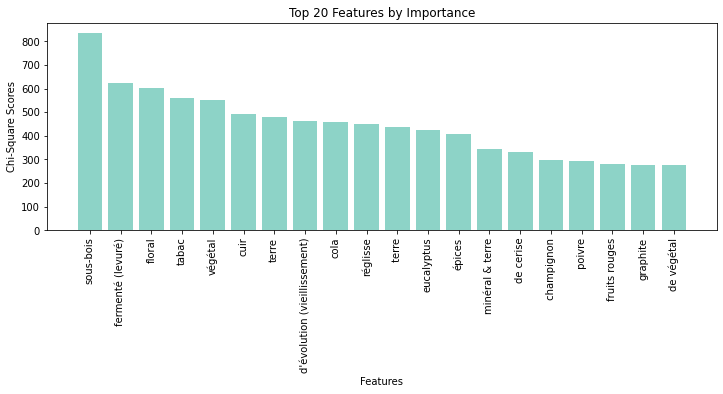

In [36]:
# Goal is to select the 20 aromas with the highest chi-square score
X = df_concatenated.drop('Cépages', axis=1)
y = df_concatenated['Cépages']

# Calculate chi-square score and Select top 20 features
selector = SelectKBest(score_func=chi2, k=20) 
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

scores = selector.scores_
idxs = range(len(scores))

top_idxs = sorted(idxs, key=lambda i: scores[i], reverse=True)[:20]
top_scores = [scores[i] for i in top_idxs]
top_features = [X.columns[i] for i in top_idxs]

# Plot the results
plt.figure(figsize=(12, 6))  
plt.bar(range(len(top_scores)), top_scores)
plt.xticks(range(len(top_scores)), top_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Chi-Square Scores')
plt.title('Top 20 Features by Importance')
plt.subplots_adjust(bottom=0.4)
plt.savefig('wine_red_feature_importance.png', dpi=300)
plt.show()



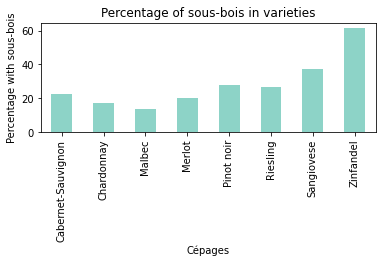

In [37]:
# Find the percentage of observations per variety containing the aroma 'sous-bois'
grouped = df.groupby('Cépages')['sous-bois'].mean() * 100
grouped.plot(kind='bar')
plt.title('Percentage of sous-bois in varieties')
plt.xlabel('Cépages')
plt.ylabel('Percentage with sous-bois')
plt.subplots_adjust(bottom=0.5)
plt.savefig('wine_sousbois.png', dpi=300)
plt.show()